In [1]:
from squlearn.feature_map.layered_feature_map import LayeredPQC,VariableGroup,LayerPQC
import numpy as np
from qiskit.circuit import ParameterVector

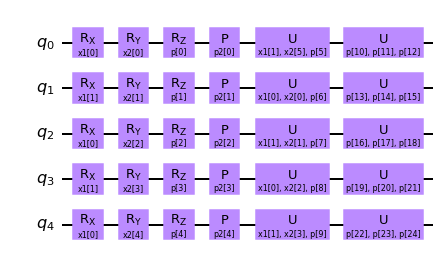

In [2]:
"""Using variable groups in one and two qubit operations"""
# To initialize a feature map with parameters (variable groups) you have to declare the variable groups first, that you want to use.
# With size= <number> you can set the dimension, so it counts clockwise, if you leave it empty, the variable group will count until infinity:
x_var = VariableGroup("x1",size=2)
x_var2 = VariableGroup("x2",size = 6)
p_var = VariableGroup("p")
p_var2 = VariableGroup("p2")

# With that you can initialize a instance of feature_map with parameters (example with 5 qubits)
feature_map_with_param = LayeredPQC(num_qubits = 5, variable_groups = (x_var,x_var2,p_var,p_var2))

# Now you are able to use qubit operations requiring parameters:


# -----------------------------------------------------------------------------------------------------------------------------------
# Single qubit operations with parameters:
feature_map_with_param.Rx(x_var)
feature_map_with_param.Ry(x_var2)
feature_map_with_param.Rz(p_var)
feature_map_with_param.P(p_var2)
# Unlike the previous operations a unitary gate layer operation needs exactly three arguments:
feature_map_with_param.U(x_var,x_var2,p_var)
# you can use the same arguments too:
feature_map_with_param.U(p_var,p_var,p_var) 
# -----------------------------------------------------------------------------------------------------------------------------------

# To print a feature map with parameters from qiskit use the following code:
x1 = ParameterVector("x1", feature_map_with_param.get_number_of_variables(x_var))
x2 = ParameterVector("x2", feature_map_with_param.get_number_of_variables(x_var2))
p = ParameterVector("p", feature_map_with_param.get_number_of_variables(p_var))
p2 = ParameterVector("p2", feature_map_with_param.get_number_of_variables(p_var2))
# To get the circuit make sure to put the variable groups in the same order as it was initialized otherwise it won't work
feature_map_with_param.get_circuit(x1,x2,p,p2).draw()

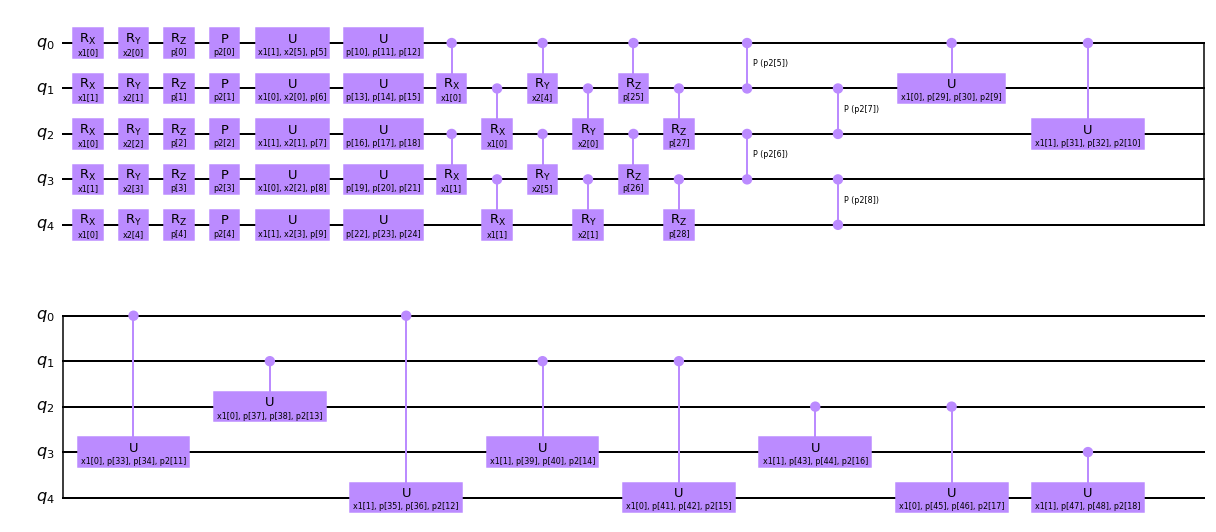

In [3]:
# -----------------------------------------------------------------------------------------------------------------------------------
# Two qubit operations with parameters:
feature_map_with_param.crx_entangling(x_var)
feature_map_with_param.cry_entangling(x_var2)
feature_map_with_param.crz_entangling(p_var)
feature_map_with_param.cp_entangling(p_var2)
# A unitary entangling operation needs exactly four arguments
feature_map_with_param.cu_entangling(x_var,p_var,p_var,p_var2, ent_strategy="AA")
# -----------------------------------------------------------------------------------------------------------------------------------


# To print a feature map with parameters from qiskit use the following code:
x1 = ParameterVector("x1", feature_map_with_param.get_number_of_variables(x_var))
x2 = ParameterVector("x2", feature_map_with_param.get_number_of_variables(x_var2))
p = ParameterVector("p", feature_map_with_param.get_number_of_variables(p_var))
p2 = ParameterVector("p2", feature_map_with_param.get_number_of_variables(p_var2))

# To get the circuit make sure to put the variable groups in the same order as it was initialized otherwise it won't work
feature_map_with_param.get_circuit(x1,x2,p,p2).draw()

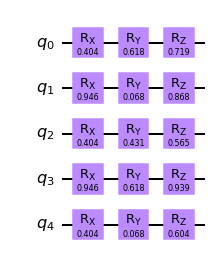

In [4]:
# You can create a feature map with numpy arrays too:

x_var = VariableGroup("x1",size=2)
x_var2 = VariableGroup("x2",size = 3)
p_var = VariableGroup("p")
p_var2 = VariableGroup("p2")

feature_map_with_param = LayeredPQC(num_qubits = 5, variable_groups = (x_var,x_var2,p_var))


feature_map_with_param.Rx(x_var)
feature_map_with_param.Ry(x_var2)
feature_map_with_param.Rz(p_var)

x = np.random.rand(feature_map_with_param.get_number_of_variables(x_var))
x2= np.random.rand(feature_map_with_param.get_number_of_variables(x_var2))
p = np.random.rand(feature_map_with_param.get_number_of_variables(p_var))

feature_map_with_param.get_circuit(x,x2,p).draw()